# Projet Numérique n°2 : Equations Différentielles

## BRETAUD David , DELMAS Louis

Système d'étude : en notant $x_1$ le nombre de proies et $x_2$ le nombre de prédateurs (tous les deux positifs), on a l'évolution suivante :
$$
\left\{\begin{matrix}
 \dot{x_1} = x_1(\alpha - \beta x_2)\\ 
 \dot{x_2} = -x_2(\gamma - \delta x_1)
\end{matrix}\right.
$$
où les 4 paramètres $\alpha$, $\beta$, $\gamma$ et $\delta$ sont strictements positifs.

In [3]:
# Modules numériques à importer pour la suite
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

# Représentation du système, réglages généraux :
a = 2   # alpha
b = 5    # beta
g = 3   # gamma
d = 4   # delta

L = 30
Int = np.linspace(0, L, 15)
LignesH = [15*i for i in range(0, 10)]

def f(x, y):
    return [x*(a-b*y), -y*(g-d*x)]

def H(x,y):
    return d*x-g*np.log(x)+b*y-a*np.log(y)

In [4]:
# Fonctions prédéfinies d'étude : 

def f1(x,y):
    return [x*(1-1*y), -y*(1-1*x)]

def f2(x,y):
    return [x*(9-2*y), -y*(9-2*x)]

def f3(x,y):
    return [x*(1-5*y), -y*(5-1*x)]

---

## Question 1


---

La population des proies a deux processus d'évolution : 
- le processus de natalité, qui augmente la population (variation positive), et est proportionnel au nombre actuel de cette population (plus on a de géniteurs, plus on a de nouveaux nés). Ce serait le terme en $\alpha x_1$ .
- le processus de mort, qui diminue la population (variation négative). Il faut prendre en compte la mort naturelle, et la mort par prédation : plus il y a de proies, plus on a un nombre susceptible de morts important, et plus il y a de prédateurs, plus les proies sont susceptibles de mourir, d'où un terme proportionnel en $x_1*x_2$, à savoir le terme $-\beta x_1x_2$.

Concernant la population des prédateurs, les deux processus sont :
- le processus de mortalité par mort naturelle, soit le terme en $-x_2\gamma$.
- le processus de natalité. Etant une population de prédateurs, plus il y aura de proies à chasser, plus elle pourra se multiplier, et à l'inverse, moins il y a de proies, moins il y a de nourriture donc naturellement, par pression naturelle, il y aura moins d'enfantement, d'où le terme en $+x_2x_1\delta$. 


On constate bien que si le processus de natalité est plus fort que le processus de mortalité, alors la population augmente, car $\dot{x_1} > 0$, et sinon, la population diminue ce qui se traduit bien par $\dot{x_1} < 0$. 

Les points d'équilibres vérifient :
$$
\left\{\begin{matrix}
 \dot{x_1} = 0\\ 
 \dot{x_2} = 0
\end{matrix}\right.
\Leftrightarrow
\left\{\begin{matrix}
 x_1(\alpha - \beta x_2) = 0 & (1)\\ 
-x_2(\gamma - \delta x_1) = 0 & (2)
\end{matrix}\right.
$$
On voit déjà que le système est vérifié pour le point (0,0). 

On multiplie par $\delta$ la première équation et la deuxième par $\beta$ puis on additionne :
Pour avoir $(x_1,x_2)$ non nul vérifiant le système non linéaire, on doit nécessairement avoir 
$$
\left\{\begin{matrix}
\alpha - \beta x_2 = 0 & \Rightarrow x_2 = \alpha / \beta \\
\gamma - \delta x_1 = 0 & \Rightarrow x_1 = \gamma / \delta
\end{matrix}\right.
$$
Le point d'équilibre $\bar{x} = (\gamma / \delta , \alpha /\beta )$ est bien dans $\mathbb{R}^{*}_{+} \times \mathbb{R}^{*}_{+}$. 

Voyons voir si les points sont localement asymptotiquement stable. Calculons la différentielle de $f$ définie par :
$$
f(x_1, x_2)= \bigl(\begin{smallmatrix}
x_1(\alpha - \beta x_2)\\ 
-x_2(\gamma - \delta x_1)
\end{smallmatrix}\bigr)
\rightarrow
J_f(x_1, x_2)= \bigl(\begin{smallmatrix}
\alpha - \beta x_2 & -\beta x_1\\ 
\delta x_2 & -\gamma + \delta x_1
\end{smallmatrix}\bigr)
$$
Evaluons la Jacobienne de f en $(0,0)$ et $(\gamma / \delta , \alpha /\beta )$ :
$$
J_f(0, 0)= J_1 = \bigl(\begin{smallmatrix}
\alpha & 0\\ 
0 & -\gamma 
\end{smallmatrix}\bigr)
\;\; et \; \;  
J_f(\gamma / \delta , \alpha /\beta )= J_2 =  \bigl(\begin{smallmatrix}
0 & -\beta \gamma / \delta\\ 
\delta \alpha / \beta & 0
\end{smallmatrix}\bigr)
$$
On utilise le fait qu'en dimension 2, on a l'équivalence suivante : $J \; est \; Hurwitz \Leftrightarrow tr(J) <0 \; et \; det(J)>0 \;$.

On constate que $J_1$ n'est pas Hurwitz car $\; det(J_1)=-\alpha \gamma <0 \;$ et $J_2$ non plus puisque $\; tr(J_2)=0 \;$.

Pour $J_1$, on peut déterminer explicitement les valeurs propres : ce sont $\alpha$ et $-\gamma$. Ainsi, comme $\alpha$ est strictement positive, on peut conclure d'après le lien entre stabilité et stabilité du linéarisé tangent que le point d'équilibre $0$ est instable.

On peut faire de même pour $J_2$ : les valeurs propres sont $i\sqrt{\alpha\gamma}$ et $-i\sqrt{\alpha\gamma}$. Elles sont imaginaires pures : on ne peut donc rien conclure pour le moment sur la stabilité du point d'équilibre associé.

---

## Question 2

---

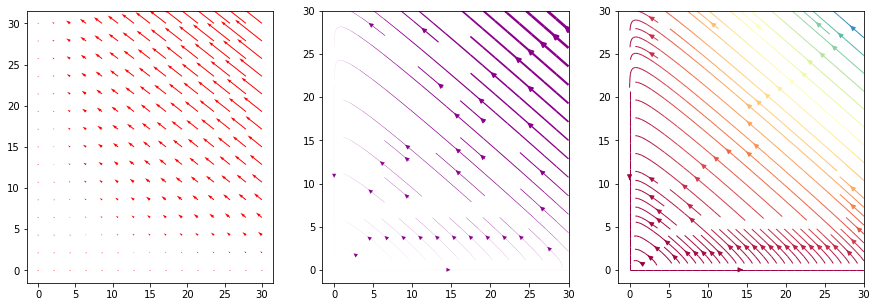

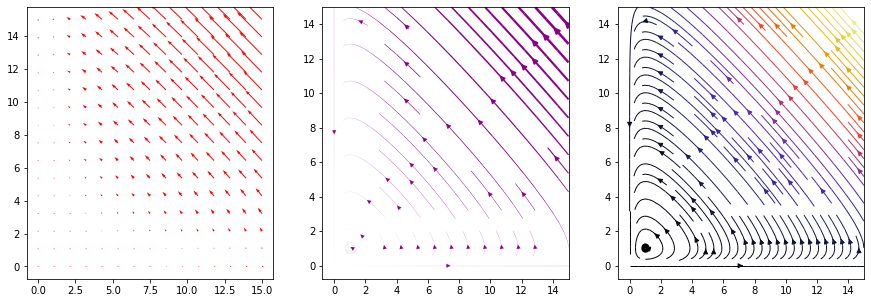

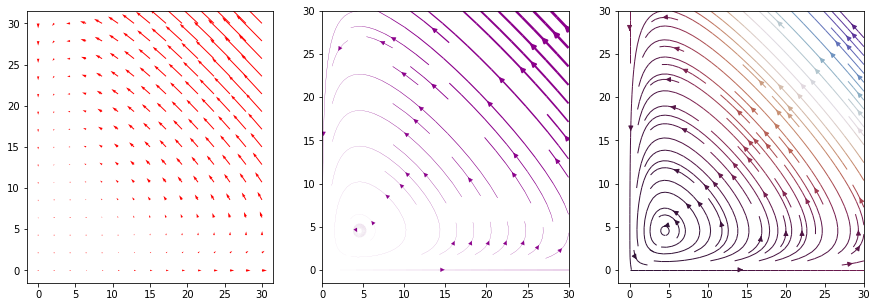

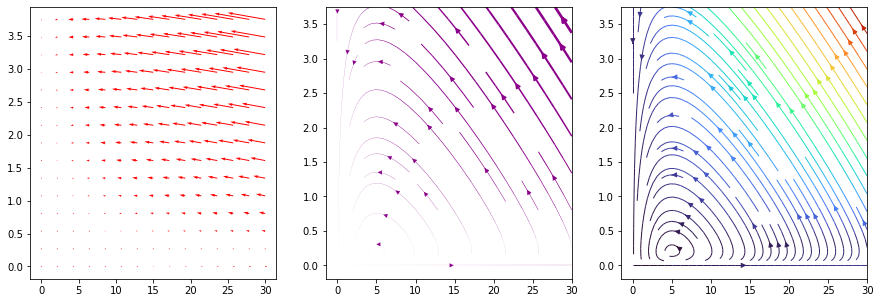

In [5]:
def portrait(f, Abs, Ord, styl) :
    X, Y = np.meshgrid(Abs, Ord)
    U, V = f(X,Y)
    speed = np.sqrt(U**2+V**2)
    lw = 3*speed/speed.max()
    
    fig = plt.figure(figsize=(15, 5))
    gs = gridspec.GridSpec(nrows=1, ncols=3)

    ax0 = fig.add_subplot(gs[0, 0])
    ax0.quiver(X, Y, U, V, color = 'red')
    
    ax1 = fig.add_subplot(gs[0, 1])
    ax1.streamplot(X, Y, U, V, density = 0.5, linewidth = lw, color = 'darkmagenta')

    ax2 = fig.add_subplot(gs[0, 2])
    ax2.streamplot(X, Y, U, V, color = lw, cmap=styl, linewidth = 1)

if True :
    portrait(f, Int, Int, 'Spectral') #'Spectral'
if True :
    portrait(f1, Int/2, Int/2, 'CMRmap') #'CMRmap'
if True :
    portrait(f2, Int, Int, 'twilight_shifted_r') #'twilight_shifted_r'
if True : 
    portrait(f3, Int, Int/8, 'turbo') #'turbo'


#Si tu veux une couleur cool pour les maps, à mettre en 4ème argument, voici la liste:
#List_color = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']
    

---

## Question 3

---

Soit $(t_0,(x_{01},x_{02})) \in \mathbb{R}^{*}_{+} \times \mathbb{R}^{*}_{+} \;$ une condition initiale fixée quelconque.

Tout d'abord, $f$ étant continue, le théorème de Péano permet de justifier qu'il existe bien des solutions au problème $\dot x=f(t,x)$ sur l'espace qui nous intéresse. 

Ensuite, le théorème du domaine maximal d'existence nous assure que toute solution maximale dans $S_f(t_0,(x_{01},x_{02}))$ est définie sur un ouvert, que l'on nommera I pour le moment. PRECISION : question 4 on nous fait déduire que justement $I=\mathbb{R}$.

Enfin, $f$ est continûment différentiable par rapport à x puisque $J_f$ est continue. On peut donc utiliser le théorème de Cauchy-Lipschitz sur I : pour toute condition initiale, il existe une unique solution maximale. 

Considérons l'unique solution maximale $x(t)$ du problème de Cauchy initialisée dans $\mathbb{R}^{*}_{+} \times \mathbb{R}^{*}_{+}$ par $x_0 = (x_{1,0}, x_{2,0})$. 

Supposons qu'il existe $t_0 \in I$ tel que $x_1(t_0) <= 0$ (le raisonnement est analogue en prenant $x_2$).

- Si $x_1(t_0) < 0$, alors comme $x_{1,0} > 0$ et que $x_1$ est continue, d'après le TVI, il existe $t_1 < t_0$ tel que $x_1(t_1) = 0$.

- Considérons alors le cas où $x_1(t_0) = 0$. Il suffit de remarquer que $x(t) = (0, x_{2,0}\exp(-\gamma t))$ est une solution maximale des équations de Lotka-Volterra avec $x_1(t_0) = 0$. Compte tenu de l'unicité de la solution maximale, on a donc $x_{1,0} = 0$ ce qui est absurde puisque $x_{1,0} > 0$.

Ainsi, toute solution maximale initialisée dans $\mathbb{R}^{*}_{+} \times \mathbb{R}^{*}_{+}$ reste dans $\mathbb{R}^{*}_{+} \times \mathbb{R}^{*}_{+}$ sur son ensemble de définition.

---

## Question 4

---

$$
\frac{dH}{dt}(x_1,x_2)= 
\left \langle \begin{pmatrix}
\delta -\gamma /x_1\\ 
\beta - \alpha /x_2
\end{pmatrix} , \begin{pmatrix}
\dot{x_1}\\ 
\dot{x_2}
\end{pmatrix}\right \rangle 
=
\left \langle \begin{pmatrix}
\delta -\gamma /x_1\\ 
\beta - \delta /x_2
\end{pmatrix} , \begin{pmatrix}
x_1(\alpha - \beta x_2)\\ 
-x_2(\gamma - \alpha x_1)
\end{pmatrix}\right \rangle
= (\delta \alpha x_1 - \gamma \alpha - \delta \beta x_1 x_2 + \gamma \beta x_2 ) + (-\beta \gamma x_2 +\gamma \alpha + \beta \delta x_1 x_2 - \delta \alpha x_1)
$$
$$
\frac{dH}{dt}(x_1,x_2)= 0
$$

Soit $x$ la solution maximale de $S_f(t_0,x_0)$ où $x_0\in \mathbb{R}^{*}_{+} \times \mathbb{R}^{*}_{+}$ : d'après la question 3, cette fonction reste dans $\mathbb{R}^{*}_{+} \times \mathbb{R}^{*}_{+}$ donc la fonction H est bien définie le long de cette solution, et reste constante.  

---

## Question 5

---

In [6]:
def display_contour(fct, abs, ord, lvl):
    X, Y = np.meshgrid(abs, ord)
    Z = fct(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(X, Y, Z, 
    colos = 'red', linestyle = '--', levels = lvl)
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1")
    plt.ylabel("$x_2")
    plt.gca().set_aspect("equal")

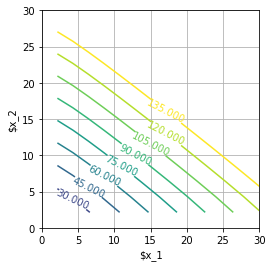

In [7]:
display_contour(H, Int, Int, LignesH)

---

## Question 6

---

In [8]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t, x = [t0], [x0]
    l = int((tf-t0)/dt)
    for i in range(l):
        el = x[i] + dt*f(t[i], x[i])
        x += [list(el) if type(el) is np.ndarray else el]
        t += [t0 + (i+1)*dt]
    return t, x

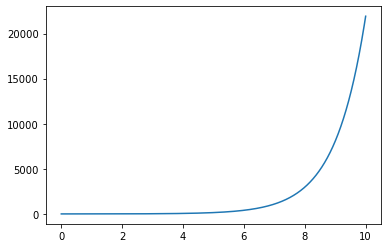

In [9]:
def exp(t, x):
    return x

t0, tf = 0, 10
dt = 10e-4
t, x = solve_euler_explicit(exp, 1, dt, t0, tf)
plt.plot(t, x) ;

On sait que le schéma d'Euler explicite est consistant d'ordre 1.

Pour le vérifier graphiquement, il suffit de tracer le logarithme de l'erreur commise et d'en déduire l'ordre.

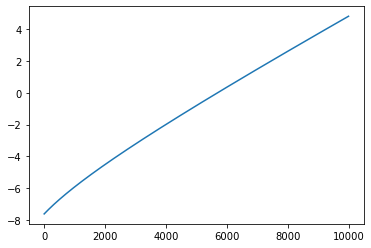

In [10]:
def mu(j):
    return la.norm(np.exp(t[j+1]) - np.exp(t[j]) - dt*exp(t[j], x[j])) / dt

mu = np.vectorize(mu)
l = int((tf-t0)/dt)
j = range(l)

plt.plot(j, np.log(mu(j))) ;

On trouve bien une droite affine, soit d'ordre 1.

---

## Question 7

---

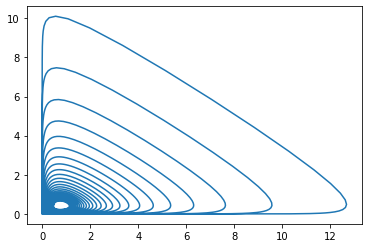

In [11]:
def F(t,x):
    return np.array(f(*x))

sol = solve_euler_explicit(F, [0.5, 0.5], 10e-3, 0.0, 100.0)
t, x = sol[0], np.array(sol[1]) # Conversion en array numpy pour effectuer des slices

plt.plot(x[:,0], x[:,1]);

En temps long, la simulation diverge complétement, ce qui n'est pas réaliste d'un point de vue biologique.
De plus, en traçant les courbes d'évolution des populations en fonction du temps, on remarque qu'on perd la périodicité des phénomènes :

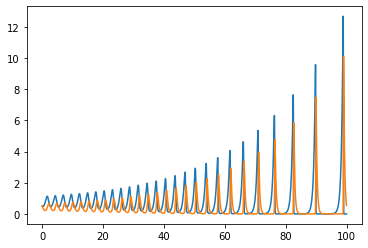

In [12]:
plt.plot(t, x[:,0]);
plt.plot(t, x[:,1]);

Traçons désormais l'évolution de H :

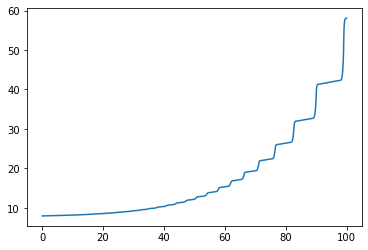

In [13]:
def H(x):
    return d*x[0] - g*np.log(x[0]) + b*x[1] - a*np.log(x[1])

h = [H(el) for el in x]
plt.plot(t, h) ;

On ne retrouve pas le caractère constant de H par rapport au temps. Ce schéma numérique est donc bien incompatible avec la résolution des équations de Lotka-Volterra.

---

## Question 8

---

In [19]:
eps = 10e-4
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    t, x = solve_euler_explicit(f, x0, dt, t0, tf)
    l = int((tf-t0)/dt)
    for j in range(l):
        def F(y):
            return x[j] + dt*f(t[j+1], y)
        x_j_0 = list(x[j]) if type(x[j]) is np.ndarray else x[j]
        x_j_k = x_j_0
        x_j_k1 = F(x_j_k)
        i = 0
        while (la.norm(x_j_k1 - x_j_k) / la.norm(x_j_0) > eps) or (i < itermax):
            x_j_k = x_j_k1
            x_j_k1 = F(x_j_k)
            i += 1
        x[j] = x_j_k
    return t, x

Vérifions sa convergence sur l'équation différentielle associée à l'exponentielle :

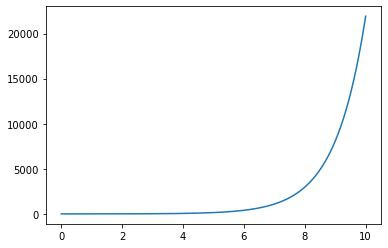

In [15]:
sol = solve_euler_implicit(exp, 1, dt, t0, tf)
plt.plot(*sol) ;

Appliquons ce schéma aux équations de Lotka-Volterra :

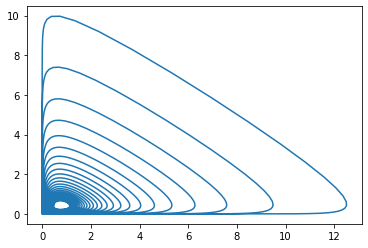

In [20]:
sol = solve_euler_implicit(F, [0.5, 0.5], 10e-3, 0.0, 100.0)
t, x = sol[0], np.array(sol[1]) # Conversion en array numpy pour effectuer des slices

plt.plot(x[:,0], x[:,1]);

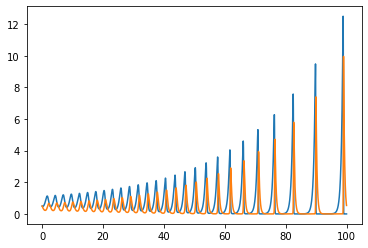

In [21]:
plt.plot(t, x[:,0]);
plt.plot(t, x[:,1]);

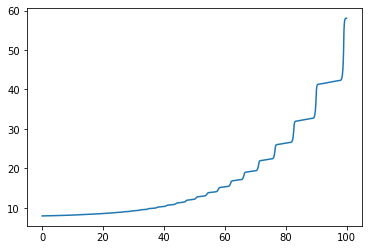

In [22]:
def H(x):
    return d*x[0] - g*np.log(x[0]) + b*x[1] - a*np.log(x[1])

h = [H(el) for el in x]
plt.plot(t, h) ;

H croît toujours, mais beaucoup moins que pour le schéma explicite.

On a donc un schéma plus pertinant, puisqu'on se rapproche de la conservation de H par rapport au temps.

---

## Question 11

---

Il suffit donc de considérer le système différentiel modifié :
$$
\left\{\begin{matrix}
 \dot{x_1} = x_1(\alpha - \beta x_2) - u_1(x_1, x_2)(H(x_1, x_2) - H_0)\\ 
 \dot{x_2} = -x_2(\gamma - \delta x_1) - u_2(x_1, x_2)(H(x_1, x_2) - H_0)
\end{matrix}\right.
$$
où $u = k\nabla H$, afin d'avoir une convergence exponentielle de $H$ vers $H_0$.

$k$ régit la vitesse à laquelle converge H. Cependant, nous allons voir qu'on ne peut pas choisir $k$ arbitrairement grand.

Soit $f(t) = H(x(t)) - H(x_O)$. Comme $f$ est dérivable sur $I$, on a alors au premier ordre : $f(t+dt) = f(t) + f'(t) dt$

D'où : $H(x^{j+1}) - H(x_0) = (H(x^{j}) - H(x_0))(1 - k\|\nabla{H(x(t))}\|)$

La norme étant strictement positive dans notre cas, alors si $k$ devient trop grand, on aurait : $1 - k\|\nabla{H(x(t))}\| < 0$.

Cela entrainerait donc une alternance dans les signes de la suite $(H(x^{j}) - H(x_0))_{j}$, ce qui est impossible puisqu'elle est de signe monotone d'après la question 10.
